# Import lib


In [1]:
import pandas as pd
import numpy as np
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# useful for getting number of output classes
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

# Dataset

In [12]:
train_path = './colored_images_mod/train'
test_path = './colored_images_mod/test'

In [13]:
classes = glob('./colored_images_mod/train/*')

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 15,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 2929 images belonging to 5 classes.


In [16]:
test_set = test_datagen.flow_from_directory(test_path,
                                           target_size = (224, 224),
                                           batch_size = 64,
                                           class_mode = 'categorical')

Found 733 images belonging to 5 classes.


# Resnet50

In [17]:
# create empty model
resnet_model = Sequential()

# import resnet50
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='max',classes=5,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

# add layers
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(521, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [18]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_3 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 521)              1067529   
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 5)                2610      
 pper)                                                           
                                                                 
Total params: 24,657,851
Trainable params: 1,070,139
Non-trainable params: 23,587,712
__________________________________

In [19]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
epochs=50
history = resnet_model.fit(
  training_set,
  validation_data=test_set,
  epochs=epochs
)

Epoch 1/50
46/46 [==============================] - 54s 1s/step - loss: 2.1829 - accuracy: 0.4220 - val_loss: 1.2851 - val_accuracy: 0.4925
Epoch 2/50
46/46 [==============================] - 34s 735ms/step - loss: 1.2527 - accuracy: 0.5213 - val_loss: 1.2081 - val_accuracy: 0.5402
Epoch 3/50
46/46 [==============================] - 34s 742ms/step - loss: 1.2096 - accuracy: 0.5647 - val_loss: 1.0743 - val_accuracy: 0.6767
Epoch 4/50
46/46 [==============================] - 36s 771ms/step - loss: 1.3156 - accuracy: 0.5077 - val_loss: 1.0825 - val_accuracy: 0.5744
Epoch 5/50
46/46 [==============================] - 35s 765ms/step - loss: 1.1336 - accuracy: 0.5865 - val_loss: 1.0596 - val_accuracy: 0.5457
Epoch 6/50
46/46 [==============================] - 35s 754ms/step - loss: 1.1585 - accuracy: 0.5770 - val_loss: 1.0141 - val_accuracy: 0.6221
Epoch 7/50
46/46 [==============================] - 34s 738ms/step - loss: 1.1258 - accuracy: 0.6023 - val_loss: 1.1230 - val_accuracy: 0.5539
Ep

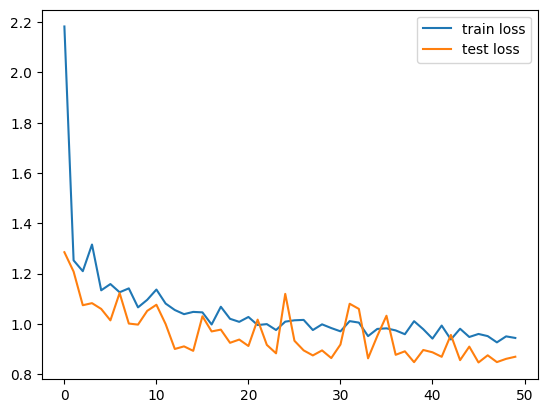

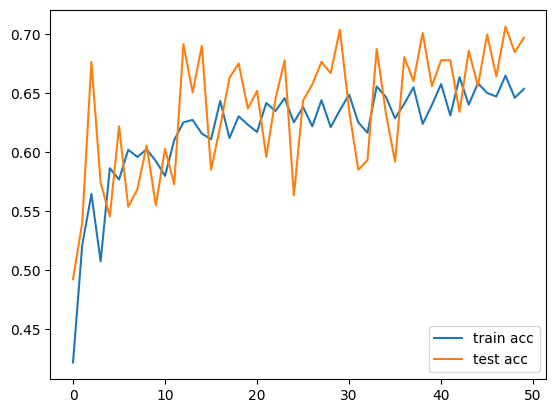

In [21]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()